# 6.1 Matplotlib基础知识

## 6.1.2 可视化的几个要素

- 创建画布，既然要画图，首先要确定在哪里作图，例如一张白纸，也就是画布。
- 绘制坐标轴，常见图表以二维为主，也就是x轴和y轴，根据数据确定好对应坐标轴的刻度，并标注清楚x和y轴的名称，同时也可以给图起个标题。
- 画图，在确定好的坐标轴基础上，把源数据画成折线的形式。同时可以设置折线的样式、颜色、图例，也可以在图上标注上每个点具体的数值。
- 润色，例如背景加上网格线，突出最高峰值的颜色，或者用平均数作为辅助线。

In [1]:
import pandas as pd
from pandas.io.formats.style import color

from common_util.openDataDir import getFullPath

## 6.2.1 画图前的准备

In [2]:
from matplotlib.font_manager import fontManager

# 查看支持的中文字体
print([f.name for f in fontManager.ttflist if 'PingFang' in f.name or 'Hiragino' in f.name])


['Hiragino Sans', 'Hiragino Sans GB', 'Hiragino Sans', 'Hiragino Maru Gothic Pro', 'Hiragino Sans', 'Hiragino Sans', 'Hiragino Mincho ProN', 'PingFang HK', 'Hiragino Sans', 'Hiragino Sans', 'Hiragino Sans', 'Hiragino Sans', 'Hiragino Sans', 'Hiragino Sans']


In [9]:
#导入画图必备的库
import matplotlib.pyplot as plt

#解决中文显示错误的问题
plt.rcParams['font.sans-serif'] = [
    'SimHei',  # Windows 黑体
    'Microsoft YaHei',  # Windows 雅黑
    'PingFang SC',  # macOS 苹方
    'Hiragino Sans GB',  # macOS 冬青黑体
    'Noto Sans CJK SC',  # Linux/通用（需安装）
    'Arial Unicode MS'  # 跨平台（需安装）
]

#让Matplotlib在Jupyter Notebook里输出高清矢量图
%config InlineBackend.figure_format = 'svg'

#画图可以直接在Jupyter Notebook内显示
%matplotlib inline

## 6.2.2 创建画布

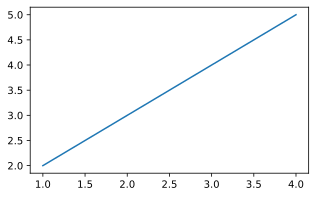

In [4]:
#创建了一个宽度为5，高度为3的画布
fig = plt.figure(figsize=(5, 3))

x = [1, 2, 3, 4]
y = [2, 3, 4, 5]

plt.plot(x, y)

#### 在一个画布上创建多个子图

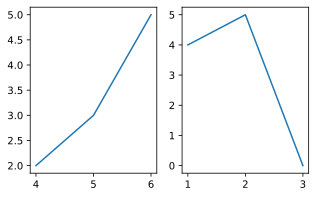

In [5]:
fig = plt.figure(figsize=(5, 3))

#在上面的画布中生成一个1行2列的子图矩阵（即横向两个子图），这里选中的是第一个子图
ax1 = plt.subplot(1, 2, 1)
#跟在子图1的后面绘制，即在子图1上画图
ax1.plot([4, 5, 6], [2, 3, 5])

#在横向两个子图中选择了第二个子图
ax2 = plt.subplot(1, 2, 2)
#在子图2上画图
ax2.plot([1, 2, 3], [4, 5, 0])

## 6.2.3 画图
### 1.简单的图表绘制

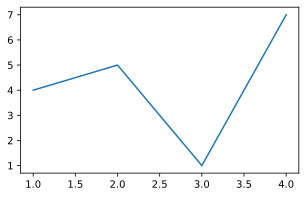

In [6]:
fig = plt.figure(figsize=(5, 3))
# 传入数据，一般用列表存储，前面是x轴的值，后面是y轴的值
plt.plot([1, 2, 3, 4], [4, 5, 1, 7])

### 2.图表参数

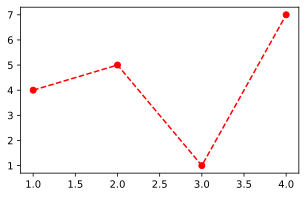

In [7]:
fig = plt.figure(figsize=(5, 3))

#color代表线条颜色，r是红色的缩写
#marker是每个点的样式，o表示用圆圈标记
#linestyle则是线条类型，这里dashed是虚线
plt.plot([1, 2, 3, 4], [4, 5, 1, 7], color='r', marker='o', linestyle='dashed')

## 6.2.4 坐标轴的设置
### 1.添加标题

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5')])

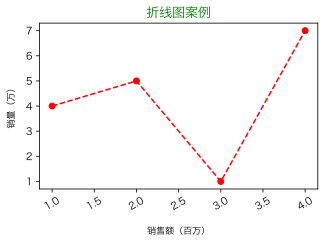

In [11]:
fig = plt.figure(figsize=(5, 3))

#添加整体图表的标题，size表示字号大小，color表示颜色
plt.title('折线图案例', size=13, color='g')

#添加x轴标题，labelpad的数值则是标题和x轴（或y轴）之间的距离
plt.xlabel('销售额（百万）', size=9, labelpad=15)

#添加y轴标题
plt.ylabel('销量（万）', size=9, labelpad=10)

plt.plot([1, 2, 3, 4], [4, 5, 1, 7], color='r', marker='o', linestyle='dashed')
# 坐标轴的刻度旋转一定的角度
plt.xticks(rotation=30)

### 2.范围调整

(0.0, 10.0)

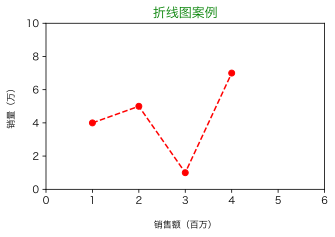

In [12]:
fig = plt.figure(figsize=(5, 3))

#添加整体图表的标题，size表示字号大小，color表示颜色
plt.title('折线图案例', size=13, color='g')

#添加x轴标题，labelpad的数值则是标题和x轴（或y轴）之间的距离
plt.xlabel('销售额（百万）', size=9, labelpad=15)

#添加y轴标题
plt.ylabel('销量（万）', size=9, labelpad=10)

plt.plot([1, 2, 3, 4], [4, 5, 1, 7], color='r', marker='o', linestyle='dashed')

plt.xlim(0, 6)
plt.ylim(0, 10)

## 6.2.5 细节润色
### 1.设置图例

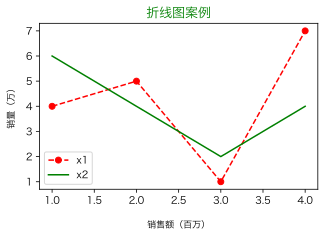

In [13]:
fig = plt.figure(figsize=(5, 3))

#添加整体图表的标题，size表示字号大小，color表示颜色
plt.title('折线图案例', size=13, color='g')

#添加x轴标题，labelpad的数值则是标题和x轴（或y轴）之间的距离
plt.xlabel('销售额（百万）', size=9, labelpad=15)

#添加y轴标题
plt.ylabel('销量（万）', size=9, labelpad=10)

#plt.xlim(0,6)
#plt.ylim(0,10)

#原来的折线，添加了label参数
plt.plot([1, 2, 3, 4], [4, 5, 1, 7], color='r', marker='o', linestyle='dashed', label='x1')
#新增的同量纲的折线
plt.plot([1, 2, 3, 4], [6, 4, 2, 4], color='g', label='x2')
#设置图例
plt.legend(loc='best')

### 2.双坐标轴设置

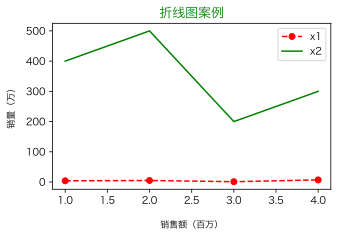

In [14]:
fig = plt.figure(figsize=(5, 3))

#添加整体图表的标题，size表示字号大小，color表示颜色
plt.title('折线图案例', size=13, color='g')

#添加x轴标题，labelpad的数值则是标题和x轴（或y轴）之间的距离
plt.xlabel('销售额（百万）', size=9, labelpad=15)

#添加y轴标题
plt.ylabel('销量（万）', size=9, labelpad=10)

#plt.xlim(0,6)
#plt.ylim(0,10)

#原来的折线
plt.plot([1, 2, 3, 4], [4, 5, 1, 7], color='r', marker='o', linestyle='dashed', label='x1')
#新增量纲不同的折线
# 因为数量级相差较大，原来x1 被压缩成一条直线
plt.plot([1, 2, 3, 4], [400, 500, 200, 300], color='g', label='x2')

plt.legend(loc='best')

In [ ]:
fig = plt.figure(figsize=(5, 3))

#添加整体图表的标题，size表示字号大小，color表示颜色
plt.title('折线图案例', size=13, color='g')

#添加x轴标题，labelpad的数值则是标题和x轴（或y轴）之间的距离
plt.xlabel('销售额（百万）', size=9, labelpad=15)

#添加y轴标题
plt.ylabel('销量（万）', size=9, labelpad=10)

#plt.xlim(0,6)
#plt.ylim(0,10)

plt.plot([1, 2, 3, 4], [4, 5, 1, 7], color='r', marker='o', linestyle='dashed')
# 画完第一条折线后添加plt.twinx()，这样第一条折线对应的是左侧的坐标轴，后面的折线对应的是右侧坐标轴
plt.twinx()

plt.plot([1, 2, 3, 4], [400, 500, 200, 300], color='g')

### 3.网格线

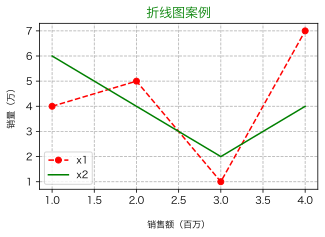

In [16]:
fig = plt.figure(figsize=(5, 3))

#添加整体图表的标题，size表示字号大小，color表示颜色
plt.title('折线图案例', size=13, color='g')

#添加x轴标题，labelpad的数值则是标题和x轴（或y轴）之间的距离
plt.xlabel('销售额（百万）', size=9, labelpad=15)

#添加y轴标题
plt.ylabel('销量（万）', size=9, labelpad=10)

#plt.xlim(0,6)
#plt.ylim(0,10)

#原来的折线，添加了label参数
plt.plot([1, 2, 3, 4], [4, 5, 1, 7], color='r', marker='o', linestyle='dashed', label='x1')
#新增的同量纲的折线
plt.plot([1, 2, 3, 4], [6, 4, 2, 4], color='g', label='x2')
#设置图例
plt.legend(loc='best')

#增加网格线
plt.grid(True, axis='both', linestyle='--')

# 6.3 常用图形的绘制
## 6.3.1 折线图

#### 画一个绿色、用点划线构成、每个点是正方形、透明度为0.8的折线图

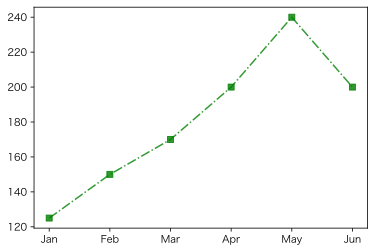

In [17]:
fig = plt.figure(figsize=(6, 4))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
product_A = [125, 150, 170, 200, 240, 200]

# 根据上面的需求绘制折线图
plt.plot(months, product_A, color='g', linestyle='-.', marker='s', alpha=0.8)

## 6.3.2 柱状图
#### 绘制了一个红色、柱子宽度0.5、居中对齐、柱子边框为黑色、柱子线宽度1.2、透明度为0.6的柱状图

<BarContainer object of 5 artists>

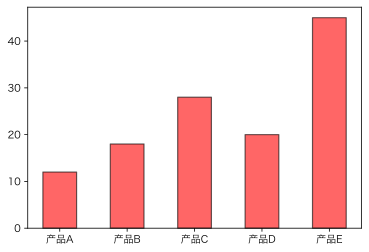

In [18]:
# 柱状图示例数据
fig = plt.figure(figsize=(6, 4))

x = ['产品A', '产品B', '产品C', '产品D', '产品E']
y = [12, 18, 28, 20, 45]

# edgecolor 柱子边框颜色,linewidth 柱子边框宽度,alpha 透明度
plt.bar(x, y, color='r', width=0.5, align='center', edgecolor='k', linewidth=1.2, alpha=0.6)

## 6.3.3 散点图

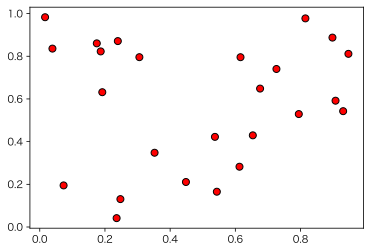

In [19]:
#导入numpy是为了用它的随机函数
import numpy as np

fig = plt.figure(figsize=(6, 4))

# 随机生成50个点
x = np.random.rand(25)
y = np.random.rand(25)

# 绘制散点图
plt.scatter(x, y, color='r', s=50, marker='o', edgecolor='k')

## 6.3.4 其他常用图表的绘制

- 水平柱状图    plt.barh()        绘制水平柱状图，用于比较不同类别的数据
- 饼图          plt.pie()         绘制饼图，用于显示各类别占比关系
- 直方图        plt.hist()        绘制直方图，用于显示数据的分布情况
- 箱线图        plt.boxplot()     绘制箱线图，用于显示数据的分布和离群点
- 小提琴图      plt.violinplot()  绘制小提琴图，用于显示数据的分布及概率密度
- 等高线图      plt.contour()     绘制等高线图，用于显示二维平面上的等值线
- 热力图        plt.imshow()      绘制热力图，用于显示矩阵或图像数据的强度值